In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:12<00:00, 97.5MB/s]
100% 1.06G/1.06G [00:12<00:00, 90.7MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

**Create Generators**

In [31]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size =32,
    image_size =(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


**Normalize**

In [7]:
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

**Create CNN Model**

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 80s 106ms/step - loss: 1.2356 - accuracy: 0.6060 - val_loss: 0.6343 - val_accuracy: 0.6892
Epoch 2/10
625/625 [==============================] - 64s 103ms/step - loss: 0.5498 - accuracy: 0.7211 - val_loss: 0.4960 - val_accuracy: 0.7554
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4724 - accuracy: 0.7789 - val_loss: 0.5778 - val_accuracy: 0.7176
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4174 - accuracy: 0.8117 - val_loss: 0.5097 - val_accuracy: 0.7542
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3708 - accuracy: 0.8348 - val_loss: 0.4793 - val_accuracy: 0.7638
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2864 - accuracy: 0.8766 - val_loss: 0.4335 - val_accuracy: 0.8008
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2068 - accuracy: 0.9151 - val_loss: 0.6481 - val_ac

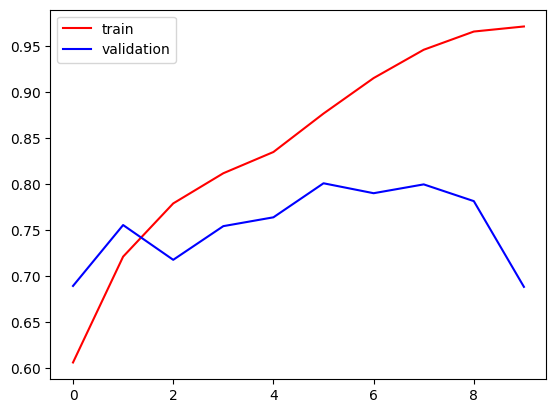

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

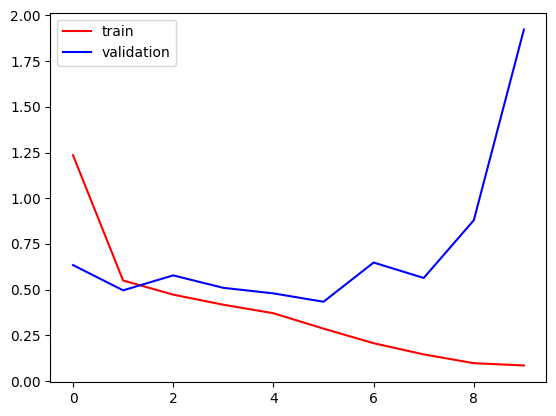

In [13]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

**Test model with a cat image**

In [14]:
import cv2

In [34]:
cat_img = cv2.imread('/content/cat.jpg')

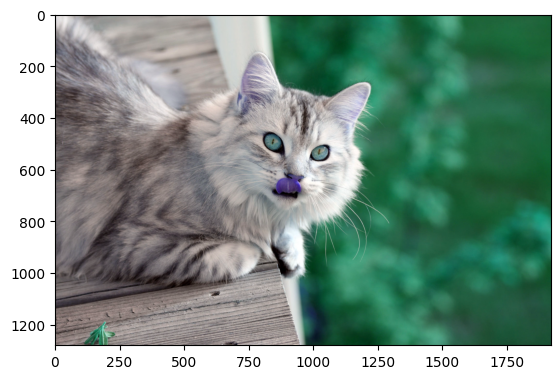

In [35]:
plt.imshow(cat_img)

In [36]:
cat_img.shape

(1280, 1920, 3)

In [37]:
cat_img = cv2.resize(cat_img,(256,256))

In [39]:
cat_input = cat_img.reshape((1,256,256,3))

In [40]:
model.predict(cat_input)

1/1 [==============================] - 0s 103ms/step


array([[1.]], dtype=float32)

**Test model with a dog image**

In [33]:
dog_img = cv2.imread('/content/dog.jpg')

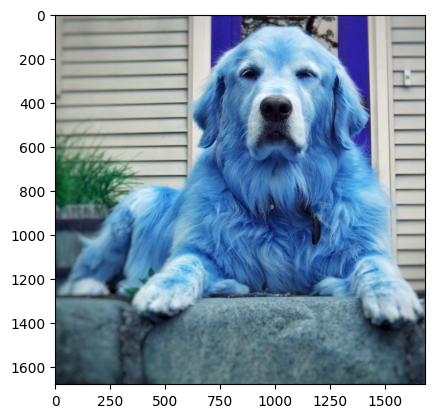

In [41]:
plt.imshow(dog_img)

In [43]:
dog_img.shape

(1680, 1680, 3)

In [44]:
dog_img = cv2.resize(dog_img,(256,256))

In [45]:
dog_input = dog_img.reshape((1,256,256,3))

In [46]:
model.predict(dog_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)